<a href="https://colab.research.google.com/github/Abdelrhman129/my-_colab_notbook/blob/main/1_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns


In [3]:
clas=["flength","fwidth","fsize","fconc","fconcl","fAsym","fm3long","fm3trans","fAlpha","fDisk","class"]
df=pd.read_csv("magic04.data.txt",names=clas)
df.head()

,flength,fwidth,fsize,fconc,fconcl,fAsym,fm3long,fm3trans,fAlpha,fDisk,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   19020 non-null  float64
 1   fwidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fconc     19020 non-null  float64
 4   fconcl    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fm3long   19020 non-null  float64
 7   fm3trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDisk     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:

df["class"]=(df["class"]=="g").astype("int")

In [6]:
df["class"].unique()

array([1, 0])

In [7]:

df.head()

,flength,fwidth,fsize,fconc,fconcl,fAsym,fm3long,fm3trans,fAlpha,fDisk,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


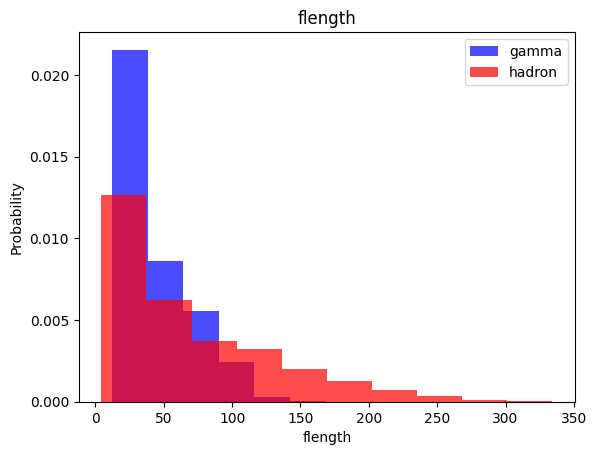

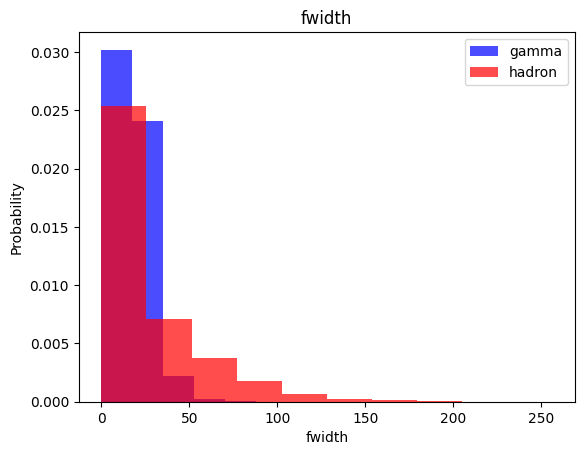

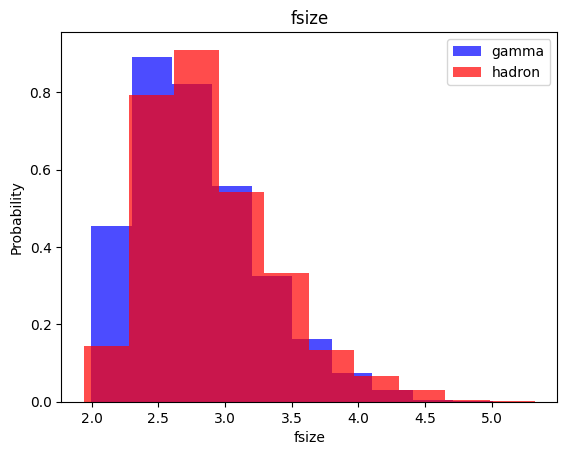

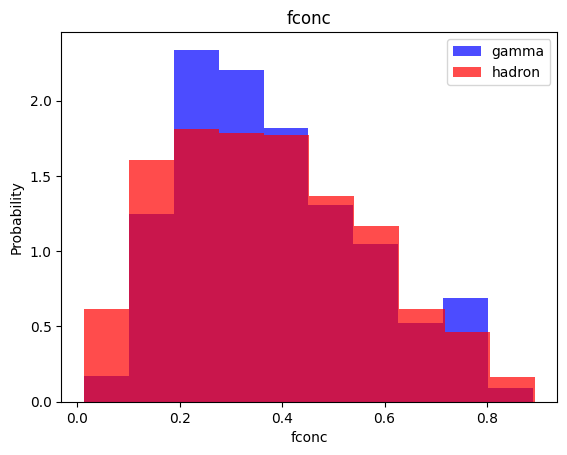

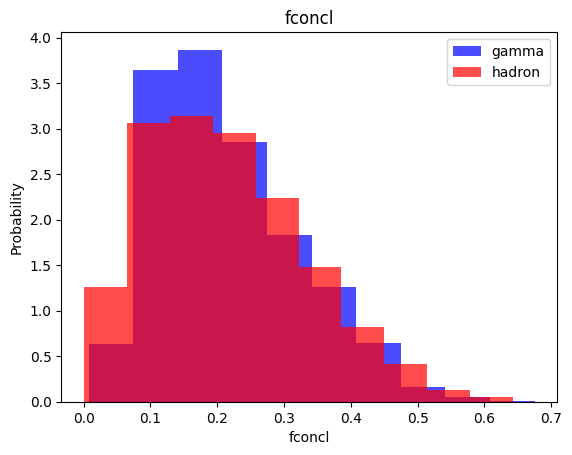

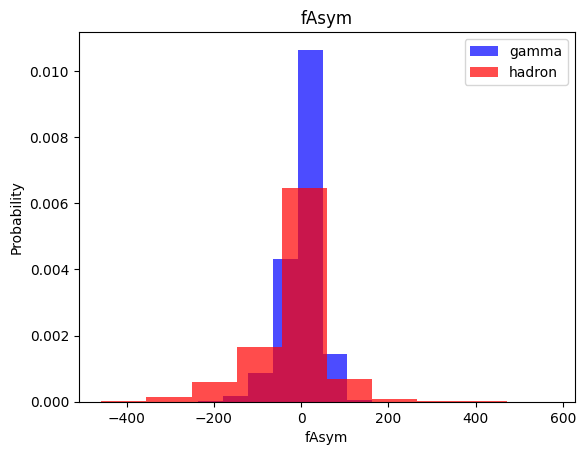

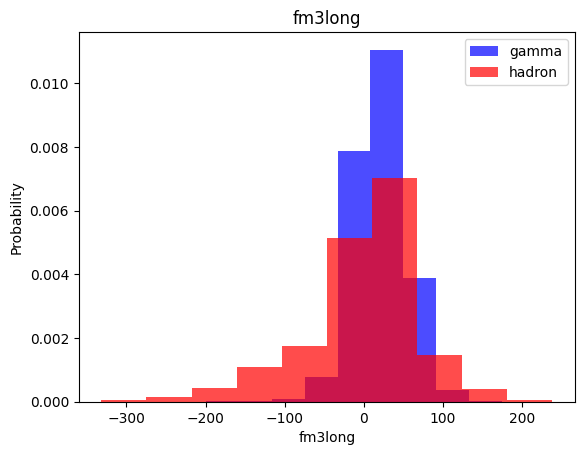

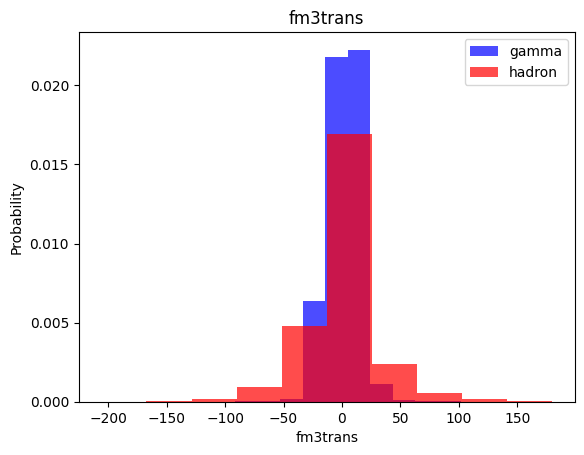

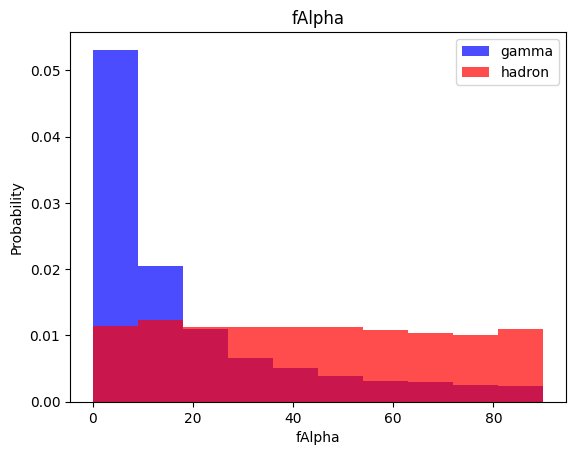

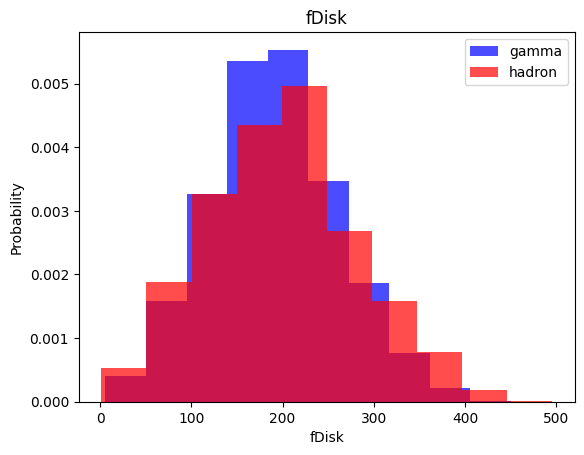

In [8]:
for label in clas[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()



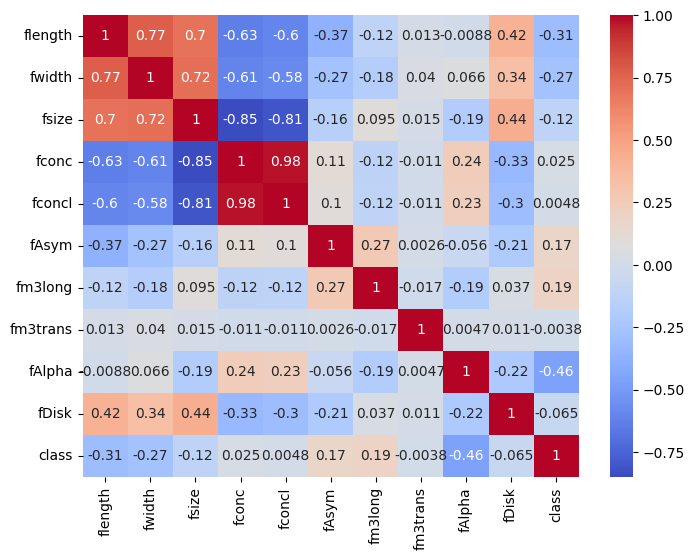

In [9]:

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

#Train, validation, test datasets

In [10]:

train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7419
3993


In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [30]:
sum(y_train==1)


np.int64(7419)

In [28]:
sum(y_train==0)

np.int64(7419)

In [29]:
len(y_train)

14838

In [17]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#KNN_MODEL

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [19]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred=knn_model.predict(x_test)

In [21]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1349
           1       0.86      0.86      0.86      2455

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [27]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      1349
           1       0.73      0.90      0.81      2455

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



#Log Regration

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1349
           1       0.84      0.83      0.84      2455

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVM_MODEL

In [24]:
from sklearn.svm import SVC

In [30]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [31]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1414
           1       0.87      0.91      0.89      2390

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [ ]:
#def scale_dataset(dataframe):
    # -----------------------------
    # 1) فصل الـ Features عن الـ Target
    # -----------------------------
    # هنا بناخد كل الأعمدة ما عدا الأخير → دي المميزات (x)
   # x = dataframe[dataframe.columns[:-1]].values

    # هنا بناخد العمود الأخير → ده الهدف أو الليبل (y)
   # y = dataframe[dataframe.columns[-1]].values

    # -----------------------------
    # 2) نعمل Standardization للمميزات
    # -----------------------------
    #scaler = StandardScaler()         # نعرف كائن من StandardScaler
   # x = scaler.fit_transform(x)       # نطبّق التحويل على x

    # -----------------------------
    # 3) نركب x (بعد التحويل) مع y في مصفوفة واحدة
    # -----------------------------
   # y = np.reshape(y, (-1, 1))        # نحول y من صف 1D لعمود 2D
   # data = np.hstack((x, y))          # نركبهم جنب بعض

    # -----------------------------
    # 4) نرجّع النتائج
    # -----------------------------
   # return data, x, y
